In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import dweibull

I used the following https://markdownguide.offshoot.io/basic-syntax/ for Markdown best practices.

#1. Project Scope
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


# Introduction to dataset
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. The SmartBay test site is located off the North shore of Galway Bay, close to Spiddal. This test site has been in operation since 2006. The dataset is located at https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather.
After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() as some variables were duplicates with different units of measure to have a more concise dataset.https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas. The data was collected at dates over 2015 and 2016.

![The Smart Bay test site](https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg "The Smart Bay test site")

# Examining original dataset

In [2]:
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Wind Speed (Meters/Sec)','Barometric Pressure (inches)'],axis =1)
df1

,SensorTimestamp,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
0,11/08/2015 14:54:33,11.7,247.8,9.9,1022.6
1,11/08/2015 14:54:42,11.9,247.8,11.1,1022.7
2,11/08/2015 14:56:59,11.9,257.1,11.7,1022.7
3,13/08/2015 10:50:11,15.1,173.7,6.5,1019.0
4,13/08/2015 12:02:42,11.4,258.1,10.1,1018.1
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,251.5,27.0,1005.4
1607,19/02/2016 10:09:15,6.2,240.2,23.4,1005.3
1608,19/02/2016 10:14:15,6.2,248.6,25.1,1005.2
1609,19/02/2016 10:19:15,6.3,246.7,25.7,1005.2


Below is plot of all 4 variables

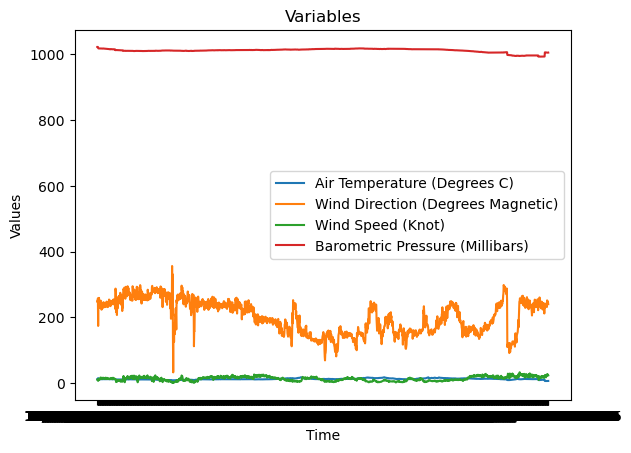

In [3]:
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Air Temperature (Degrees C)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Wind Direction (Degrees Magnetic)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Wind Speed (Knot)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Barometric Pressure (Millibars)')
plt.title('Variables')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Air Temperature (Degrees C)','Wind Direction (Degrees Magnetic)','Wind Speed (Knot)','Barometric Pressure (Millibars)'])
plt.show()

# Variables in dataset

The following 4 variables are part of my dataset. 

1. Air Temperature (Degrees C) is measured by a thermometer. The temperature of the air can affect the weather. Warm air rises above cold air due to its density. The term temperature gradient is used to describe the temperature differences between 2 points. A higher temperature gradient leads to a higher wind speed.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. This variable is measured in degrees Celsius.

2. Wind Direction (Degrees Magnetic) relates to the direction from which the wind is blowing. "It is based on the 360° azimuth circle with the 0/360° azimuth radial aligned  with  magnetic north." https://meteorologytraining.tpub.com/14269/css/14269_56.htm. Wind directions also give rise to distinct local wind patterns that affect specific areas. Sea and land breezes are excellent examples of such patterns. During the day, the land heats up more quickly than the adjacent water, causing air to rise over the land and draw in cooler air from the sea. Therefore, these breezes are called sea breezes. At night, the process reverses, and the land breeze blows from the cooler land towards the warmer water. These processes create land breezes.https://a-z-animals.com/blog/wind-direction-meaning-unraveling-the-significance-and-effects-of-wind-directions/. In Ireland, the wind blows from the south and west most often, while flow from the northeast or south least often. https://www.met.ie/climate/what-we-measure/wind. Wind Direction (Degrees Magnetic) is measured by a vane. 

3. Wind Speed (Knot) is typically measured by an anemometer and can be defined as the rate at which air moves horizontally past a point. Wind is created when air moves from areas of high pressure to areas of low pressure. Temperature gradients are higher during winter as a result, and this brings faster wind.
https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed,https://sciencing.com/winds-formed-5145233.html

4. Barometric Pressure (inches) is measured by a barometer, and is also known as atmospheric pressure, and is the force exerted by the weight of the atmosphere on the earths surface. A unit of pressure is a pascal. Barometric Pressure is measured typically by a mercury barometer. Low atmospheric pressure typically leads to wind while high pressure typically leads to calm weather. https://education.nationalgeographic.org/resource/atmospheric-pressure/. Differences in atmospheric pressure generate winds.


# Exploring new dataset (df2)
In the code below I add a new column called "datetime". SensorTimestamp column is int 64 bit, with type as a datetime. To filter on a particular date, I have set the datetime column as the index column. I am filtering data on a 24 hour period  (16th Aug 2015) which has 272 datapoints. This data is the basis i will use to synthesise my new data set. I use the .dtypes and .info() commands to display information on the variables in my new dataset.

In [4]:
pd.to_datetime(df1['SensorTimestamp'])
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])
df1.set_index('datetime', inplace=True)
df2 =df1.loc[('2015-08-16')]

In [5]:
df2

,SensorTimestamp,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
datetime,,,,,
2015-08-16 00:00:25,16/08/2015 00:00:25,11.5,229.0,16.4,1013.1
2015-08-16 00:05:25,16/08/2015 00:05:25,11.6,231.2,16.0,1013.3
2015-08-16 00:10:25,16/08/2015 00:10:25,11.5,232.5,14.3,1013.2
2015-08-16 00:15:25,16/08/2015 00:15:25,11.7,231.3,12.2,1013.2
2015-08-16 00:20:25,16/08/2015 00:20:25,11.6,218.9,17.0,1013.2
...,...,...,...,...,...
2015-08-16 23:36:31,16/08/2015 23:36:31,12.0,151.8,4.6,1017.1
2015-08-16 23:41:32,16/08/2015 23:41:32,12.3,145.4,5.1,1017.0
2015-08-16 23:46:32,16/08/2015 23:46:32,12.2,147.5,4.7,1017.0


In [6]:
df2.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
Barometric Pressure (Millibars)      float64
dtype: object

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Wind Direction (Degrees Magnetic)  272 non-null    float64
 3   Wind Speed (Knot)                  272 non-null    float64
 4   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.8+ KB


# Types of variables
Four of the variables in my dataset are **real** numbers with 1 decimal place. All the variables in the dataset are positive so these variables can also be classified as *non negative*. They are non null float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, 

These variables are *Quantitative*, as they are numerical that represent quantities. These are also *continuous variables* as they can take on any numerical value in a range. https://www.statisticshowto.com/quantitative-variables-data/.  

The remaining variable I created in steps above called "datetime" and is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html.  

 The datetime variable is also *Quantitative*, and can be classified as a *continuous variable*.

1. Air Temperature (Degrees C)                 non negative real number with 1 decimal place.              
2. Wind Direction (Degrees Magnetic)           non negative real number with 1 decimal place.
3. Wind Speed (Knot)                           non negative real number with 1 decimal place.
4. Barometric Pressure (Millibars)             non negative real number with 1 decimal place.
5. datetime                                    datetime64[ns]

In [8]:
df2.info('datetime')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Wind Direction (Degrees Magnetic)  272 non-null    float64
 3   Wind Speed (Knot)                  272 non-null    float64
 4   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.8+ KB


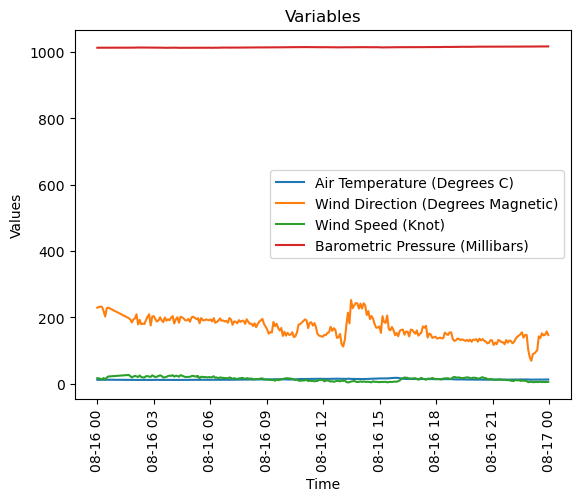

In [9]:
sns.lineplot(data=df2, x = 'datetime', y = 'Air Temperature (Degrees C)')
sns.lineplot(data=df2, x = 'datetime', y = 'Wind Direction (Degrees Magnetic)')
sns.lineplot(data=df2, x = 'datetime', y = 'Wind Speed (Knot)')
sns.lineplot(data=df2, x = 'datetime', y = 'Barometric Pressure (Millibars)')
plt.title('Variables')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.legend(['Air Temperature (Degrees C)','Wind Direction (Degrees Magnetic)','Wind Speed (Knot)','Barometric Pressure (Millibars)'])
plt.show()

# Likely Distribution

For each of my variables I will be using the following distribution to synthesise a new dataset. I had planned on using different distribution (triangular & dweibull) instead of normal distribution for some variables, but I discovered once the *seed* was removed a normal distribution reflected my original dataset more consistently.

1.   Air Temperature (Degrees C):           (Normal Distribution)
2.   Wind Direction (Degrees Magnetic):     (Dweibull Distribution)
3.   Wind Speed (Knot):                     (Normal Distribution)
4.   Barometric Pressure (Millibars):       (Normal Distribution)

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model later.

In [10]:
df2.describe()

,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,168.141912,13.728676,1014.639706
std,1.415816,32.276567,5.782885,1.183171
min,11.000000,68.900000,3.600000,1012.800000
25%,11.700000,142.875000,8.575000,1013.600000
50%,12.400000,170.050000,14.200000,1014.600000
75%,13.900000,191.100000,18.025000,1015.325000
max,17.500000,252.200000,26.100000,1017.100000


# Relationship between variables

 After researching the variables in my dataset, the following relationships should be present.  

 - Air Temperature (Degrees C), Wind Speed (Knot),Barometric Pressure (Millibars) can be classed as linear variables, while Wind Direction (Degrees Magnetic) is a circular variable as data can range from 0 to 360 deg and start again at 0 degrees. Wind direction (circular) is often associated with Air temp (Linear). https://link.springer.com/article/10.1007/s00703-017-0508-y .1

 - I am expecting a negative correlation between Wind Speed (Knot) and Barometric Pressure (Millibars) https://www.education.com/science-fair/article/windy-weather-ii-correlation-between-barometric/ .   
    as Warm temperatures causes Barometric pressure to rise while cold air causes Barometric pressure to fall. I discovered the Coriolis effect which describes how the wind deflects from its straight path between high and low pressure areas https://www.thoughtco.com/winds-and-the-pressure-gradient-force-1434440. The wind path would be opposite so if the data was collected in southern hemisphere, then relationship would be positive. https://education.nationalgeographic.org/resource/coriolis-effect/. 

- I am expecting a negative correlation between Wind Direction (Degrees Magnetic) and Barometric Pressure (Millibars) for the same reason as relationship between Wind Speed (Knot) and Barometric Pressure (Millibars) 

 - I am expecting a negative correlation between Air Temperature (Degrees C) &Wind Speed (Knot), as temperature differences between air masses cause pressure differences which results in wind.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. A higher temperature gradient leads to a higher wind speed.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. -.6

![The Coreolis](https://sageography.co.za/wp-content/uploads/sites/2/2012/11/3coriolis.gif "The Coreolis")

 - I did not find any literature to indicate any relationship between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) 

# Correlation Analysis of original dataset

Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is  [[ 1.         -0.68345298]
 [-0.68345298  1.        ]]


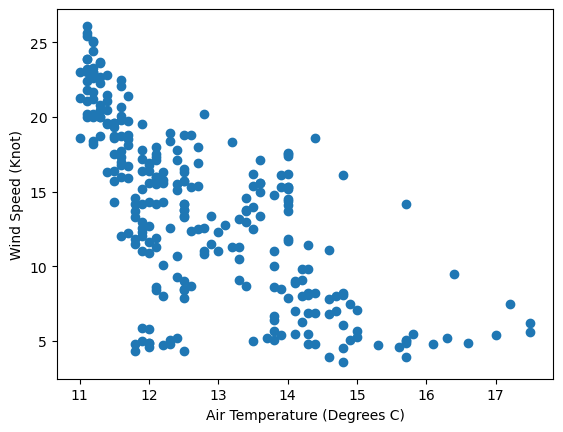

In [11]:
x =df2['Air Temperature (Degrees C)']
y =df2['Wind Speed (Knot)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is ', r)
plt.scatter(x, y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is  [[ 1.         -0.11180902]
 [-0.11180902  1.        ]]


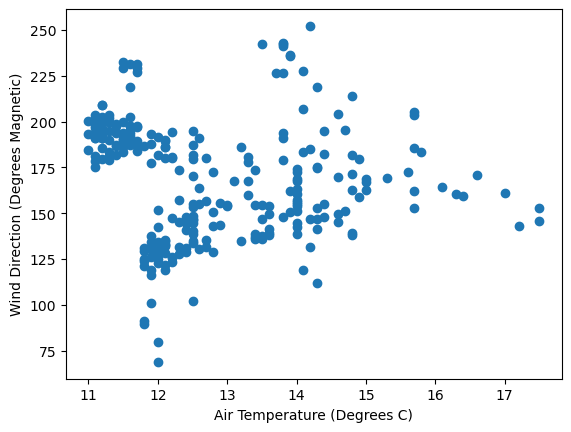

In [12]:
x =df2['Air Temperature (Degrees C)']
y =df2['Wind Direction (Degrees Magnetic)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is ', r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (Millibars) is  [[1.        0.2188932]
 [0.2188932 1.       ]]


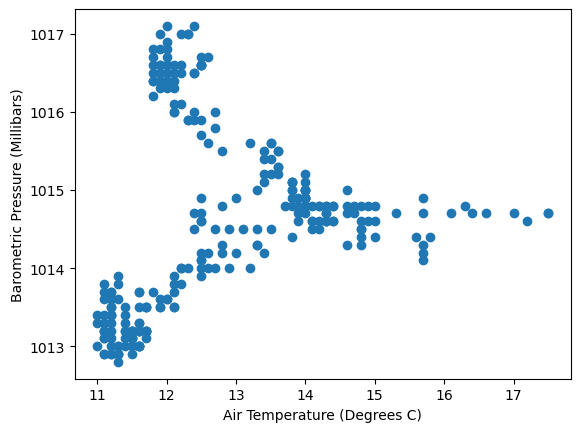

In [13]:
x =df2['Air Temperature (Degrees C)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is  [[1.         0.22993643]
 [0.22993643 1.        ]]


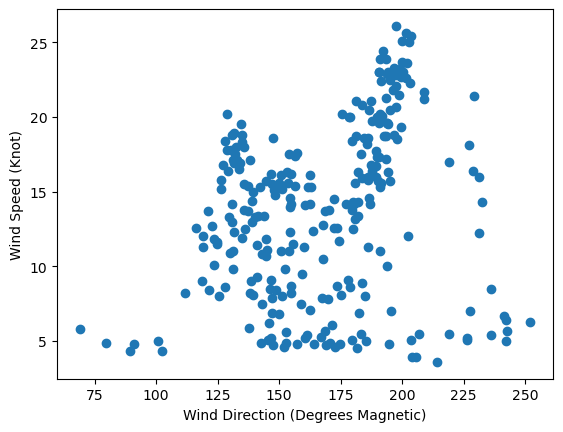

In [14]:
x =df2['Wind Direction (Degrees Magnetic)']
y =df2['Wind Speed (Knot)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (Millibars) is  -0.7453251909394746


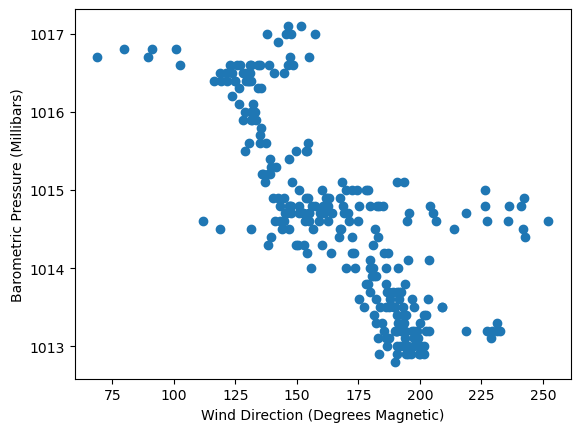

In [15]:
x =df2['Wind Direction (Degrees Magnetic)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)[0,1]
print('Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (Millibars) is  [[ 1.         -0.52556303]
 [-0.52556303  1.        ]]


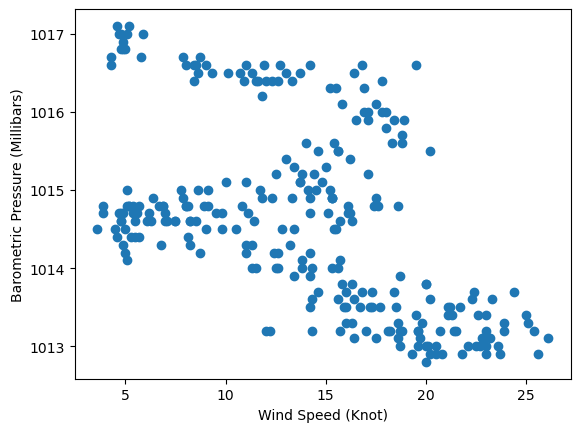

In [16]:
x =df2['Wind Speed (Knot)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Speed (Knot)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

# Relationship summary of original dataset

A correlation of -1 indicates a perfect negative correlation, 0 indicates no correlation and +1 indicates perfect positive correlation.  
From my research of the variables in my dataset, I was able to determine which variables  *should* have a strong relationship and which variables *should* be independent variables. 

- The relationship between variables Wind Direction (Degrees Magnetic) and  Air Temperature (Degrees C) is **-0.11**. I would have expected this relationship to be closer to -1. I am assuming that if data was analysed over a longer period, then this relationship would be stronger.  

- The relationship between Wind Speed (Knot) and Barometric Pressure (Millibars) is strongly negative at **-0.52**. This is what I expected based on my research.  

- The relationship between Wind Direction (Degrees Magnetic) and Barometric Pressure (Millibars) also has a strong negative relationship at **-0.74**. Again, this is roughly the outcome I expected based on  my research.  

- The relationship between Air Temperature (Degrees C) &Wind Speed (Knot) is strongly negative @ **-0.68**. Based on my research, this is what I expected to see.

- The relationship between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is independent at  **-0.11**. Based on my research, this is the outcome I expected.


I don't have a categorical variable in my dataset to model so it impossible to distinguish between variables in below pairplot.

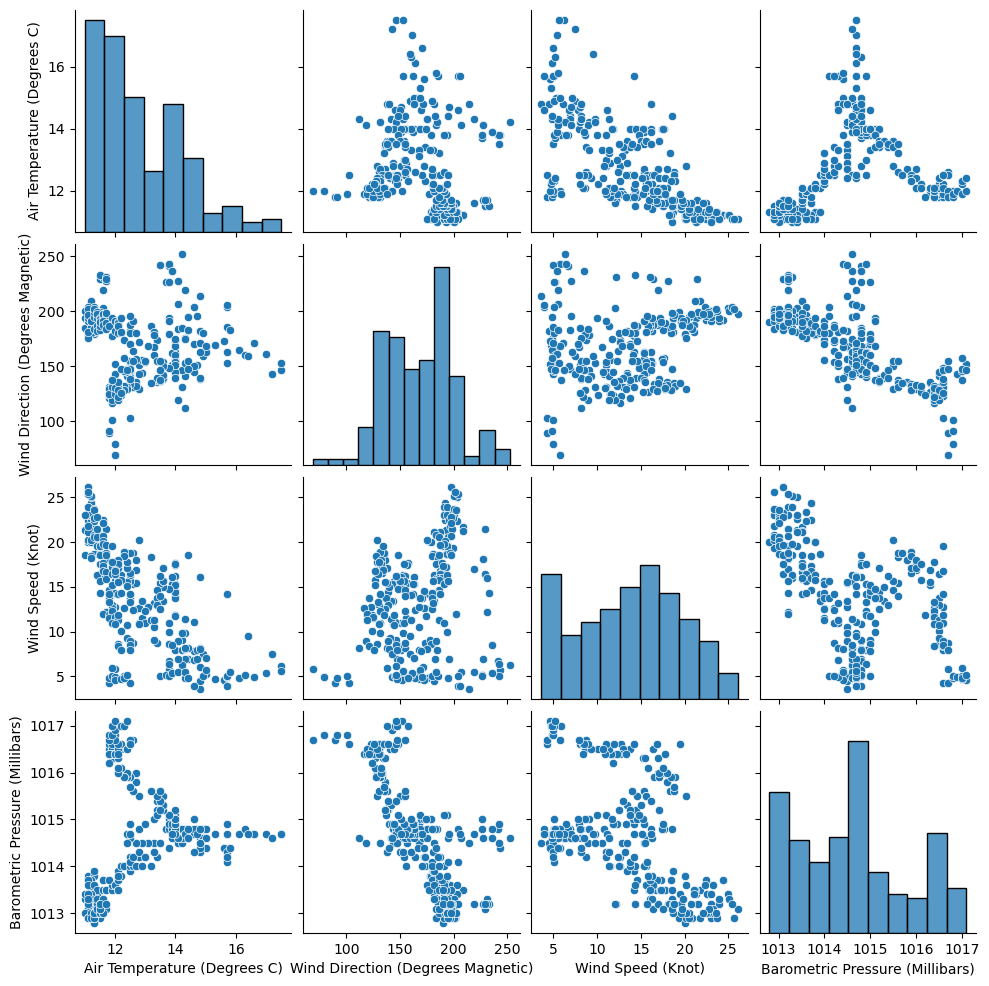

In [17]:
sns.pairplot(df2)
plt.show()

# Synthesising new  Data Set

I have set-up a data range which will be used when synthesising data. There will be 272 datapoints created, and the frequency is minutes to replicate my original dataset.

In [18]:
idx1 = pd.date_range(start = "2023-11-08 00:00:01", periods=272, freq="MIN",)
#idx1

## Air Temperature (Degrees C)


To model Synthesised Air Temperature (Degrees C) I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continuous probability distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. The mean and standard deviation are displayed above using .decribe(). I am using *round(1)* method to round number to 1 decimal place to mirror original data.

In [19]:
mu = 12.801
sigma = 1.415
rng=np.random.default_rng()
ts01a = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts01 = ts01a.round(1)

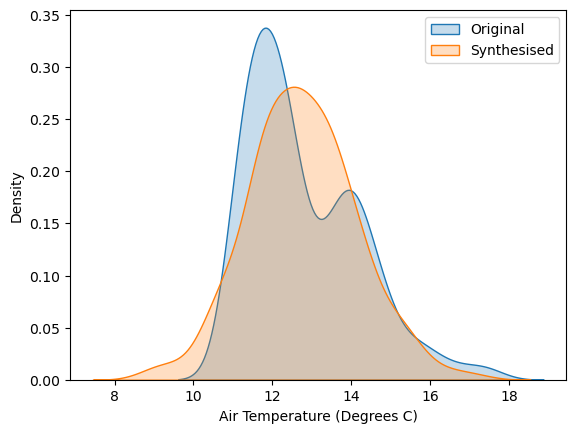

In [20]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True, label="Original")
sns.kdeplot(ts01['Synthesised Air Temperature (Degrees C)'],shade=True, label="Synthesised")
plt.legend()

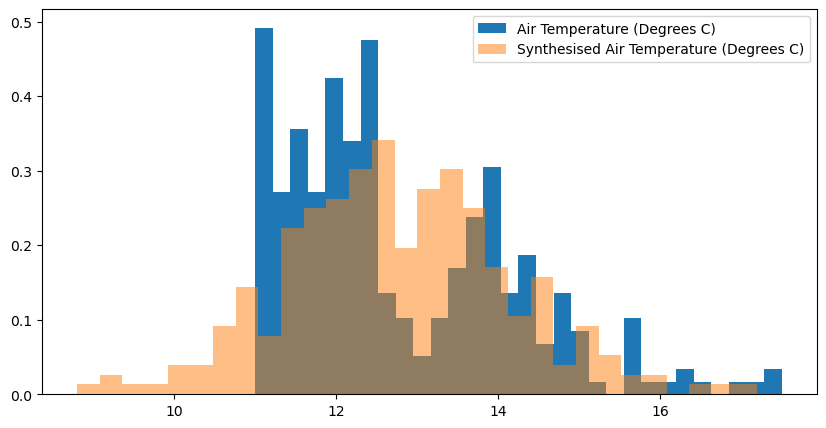

In [21]:

plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(df2['Air Temperature (Degrees C)'], 30, density=True)
count, bins, ignored = plt.hist(ts01['Synthesised Air Temperature (Degrees C)'], 30, density=True, alpha=.5)
plt.legend(['Air Temperature (Degrees C)','Synthesised Air Temperature (Degrees C)'])
plt.show()

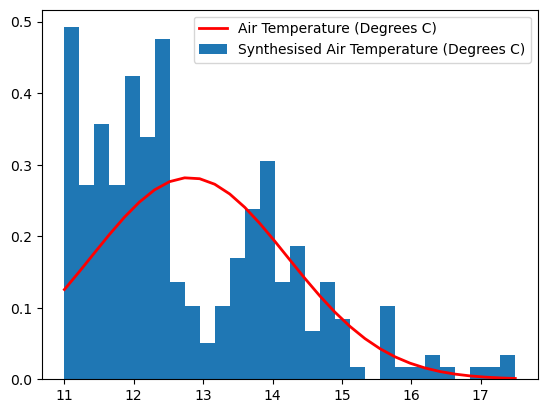

In [22]:
mu = 12.801
sigma = 1.415

count, bins, ignored = plt.hist(df2['Air Temperature (Degrees C)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Air Temperature (Degrees C)','Synthesised Air Temperature (Degrees C)'])
plt.show()

## Synthesised Wind Direction (Degrees Magnetic)

For variable Synthesised Wind Direction (Degrees Magnetic) I will use Dweibull distribution.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull.

The Weibull distribution is a continuous probability distribution used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthesising Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continuous random variable, typically used to model the failure rate of a system over time.  

mean and std dev info from .describe above.

I assigned the *shape* value = mean and *scale* = std dev as I found by doing this, the outcome matches original data set more closely. I am using *round(1)* method to round number to 1 decimal place to mirror original data.

In [23]:
mean = 168.141
std_dev = 32.276
shape = mean
scale = std_dev

np.random.seed()
ts02a = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts02 = ts02a.round(1)

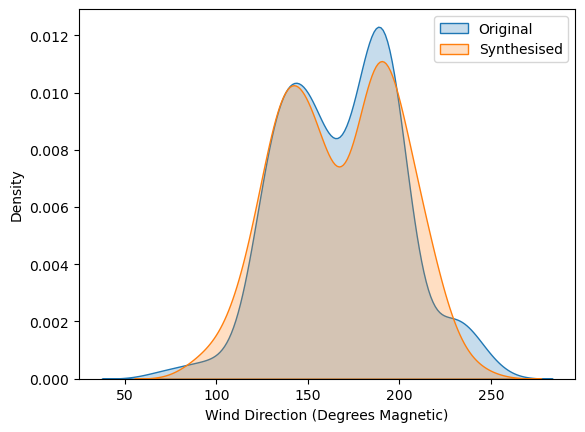

In [24]:
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True,label = 'Original')
sns.kdeplot((ts02['Synthesised Wind Direction (Degrees Magnetic)']),shade=True,label = 'Synthesised')
plt.legend()

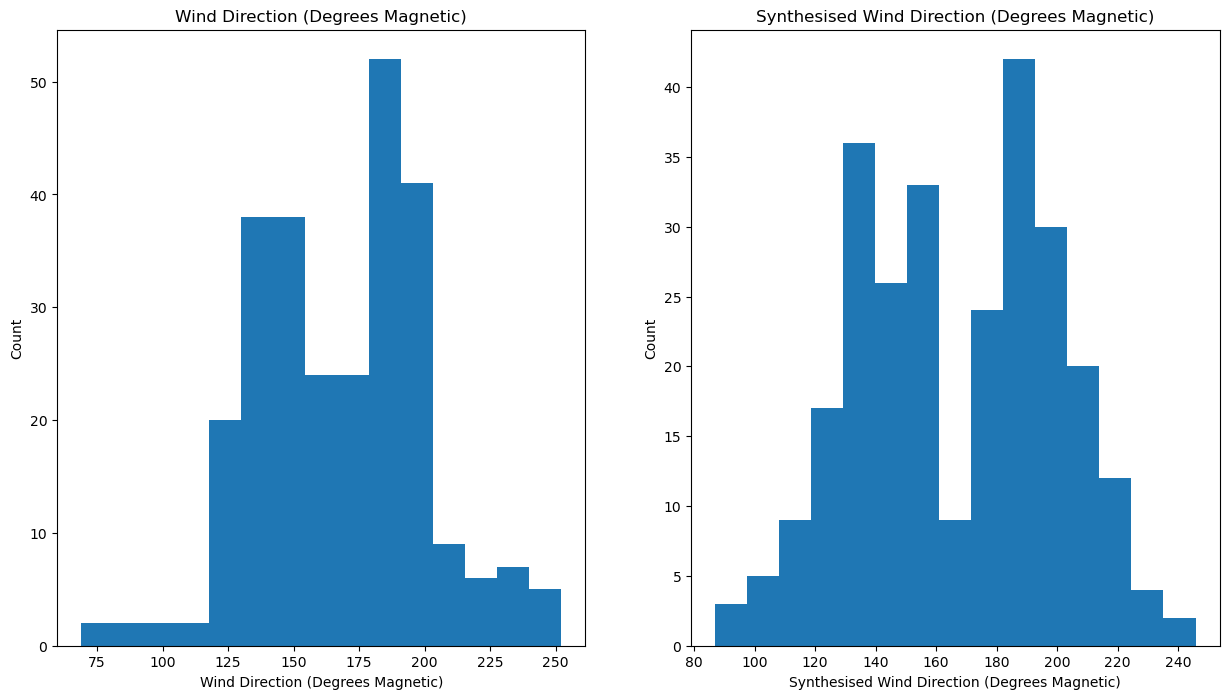

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Wind Direction (Degrees Magnetic)")

plt.subplot(1,2,2)
plt.hist(ts02["Synthesised Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Synthesised Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Synthesised Wind Direction (Degrees Magnetic)")
plt.show()

## Synthesised Wind Speed (Knot)

To model Synthesised Wind Speed (Knot) I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continious probabilty distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. I am modifying data using *abs()* method, to return the positive value as there are not any negative values in my original dataset. The min,mean and standard deviation values are displayed above using .decribe(). I am using *round(1)* method to round number to 1 decimal place to mirror original data.

In [26]:
mu  = 13.728676
sigma = 5.782885
rng=np.random.default_rng()
ts03a = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts03 = ts03a.abs().round(1)


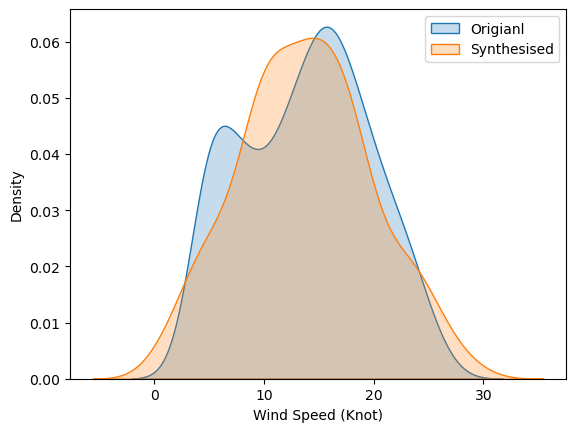

In [27]:
sns.kdeplot(df2['Wind Speed (Knot)'],shade=True,label ='Origianl')
sns.kdeplot((ts03['Synthesised Wind Speed (Knot)']),shade=True,label = 'Synthesised')
plt.legend()

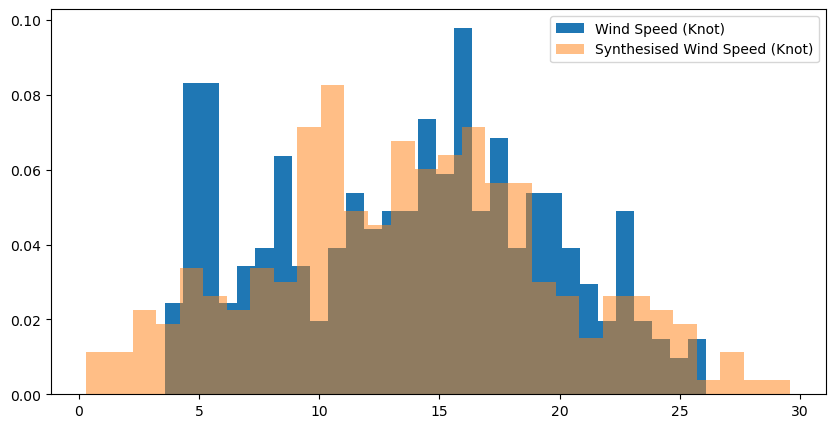

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(df2['Wind Speed (Knot)'], 30, density=True)
count, bins, ignored = plt.hist(ts03['Synthesised Wind Speed (Knot)'], 30, density=True,alpha=.5)
plt.legend(['Wind Speed (Knot)','Synthesised Wind Speed (Knot)'])
plt.show()

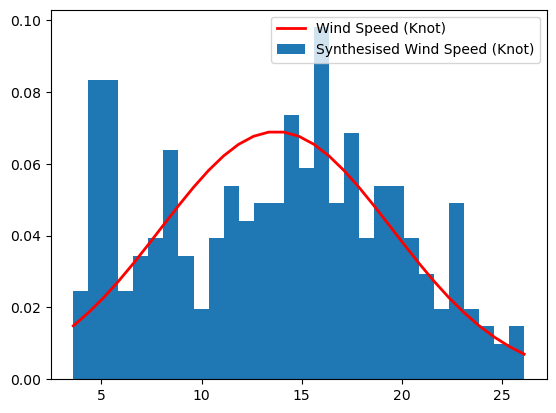

In [29]:
count, bins, ignored = plt.hist(df2['Wind Speed (Knot)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Wind Speed (Knot)','Synthesised Wind Speed (Knot)'])
plt.show()

## Synthesised Barometric Pressure (Millibars)
The next variable I synthesised is called "Synthesised Barometric Pressure (Millibars)". To model this, I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continuous probability distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal. I am using *round(1)* method to round number to 1 decimal place to mirror original data. I had planned on using triangular distribution to model this variable, but once seed was removed I found normal distribution matched my original data set most consistently. I have added code example for triangular distribution & Dweibull distribution below in "Alternative distributions tested" section

In [30]:
mu = 1014.639706
sigma = 1.183171
rng=np.random.default_rng()
ts04a = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Barometric Pressure (Millibars)'])
ts04 = ts04a.round(1)

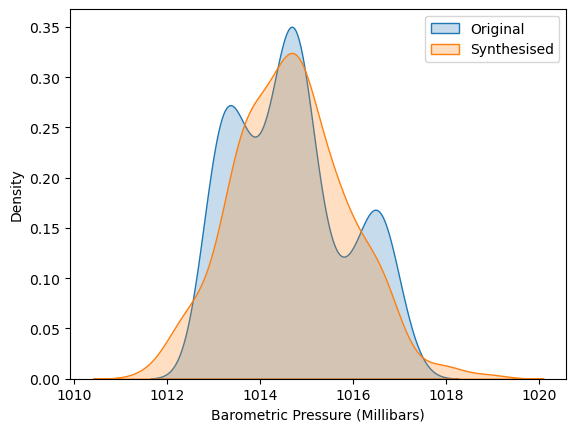

In [31]:
sns.kdeplot(df2['Barometric Pressure (Millibars)'],shade=True,label = 'Original')
sns.kdeplot(ts04['Synthesised Barometric Pressure (Millibars)'],shade=True,label ='Synthesised')
plt.legend()

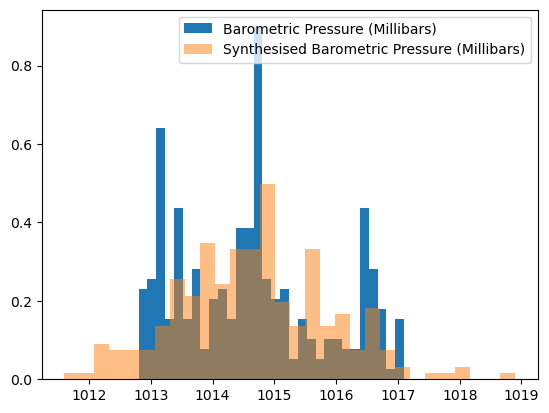

In [32]:
count, bins, ignored = plt.hist(df2['Barometric Pressure (Millibars)'], 30, density=True)
count, bins, ignored = plt.hist(ts04['Synthesised Barometric Pressure (Millibars)'], 30, density=True,alpha=.5)
plt.legend(['Barometric Pressure (Millibars)','Synthesised Barometric Pressure (Millibars)'])
plt.show()

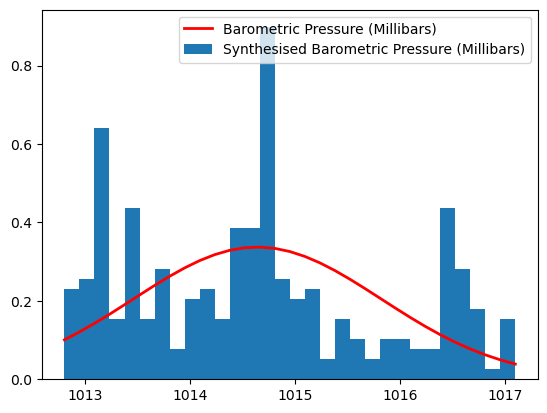

In [33]:
count, bins, ignored = plt.hist(df2['Barometric Pressure (Millibars)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Barometric Pressure (Millibars)','Synthesised Barometric Pressure (Millibars)'])
plt.show()

# New Synthesised Dataset(result)

In [34]:
result=pd.concat([ts01,ts02,ts03,ts04],axis =1)
result


,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
2023-11-08 00:00:01,13.7,225.2,12.7,1015.1
2023-11-08 00:01:01,11.6,207.1,4.0,1012.3
2023-11-08 00:02:01,10.8,183.6,0.5,1014.7
2023-11-08 00:03:01,15.7,125.9,24.3,1015.1
2023-11-08 00:04:01,11.9,138.0,16.6,1015.0
...,...,...,...,...
2023-11-08 04:27:01,11.0,151.5,10.8,1015.3
2023-11-08 04:28:01,12.8,115.6,11.6,1014.9
2023-11-08 04:29:01,9.7,204.2,14.2,1016.4
2023-11-08 04:30:01,14.5,207.5,10.8,1016.5


In [35]:
result.describe()

,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.755147,167.106985,13.751838,1014.665074
std,1.381470,32.586659,6.033094,1.222571
min,8.800000,86.900000,0.300000,1011.600000
25%,11.800000,139.650000,9.700000,1013.800000
50%,12.700000,167.800000,13.600000,1014.650000
75%,13.600000,192.675000,17.625000,1015.500000
max,17.200000,245.800000,29.600000,1018.900000


# Correlation Analysis of Synthesised dataset

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Speed (Knot) is  [[1.         0.13285857]
 [0.13285857 1.        ]]


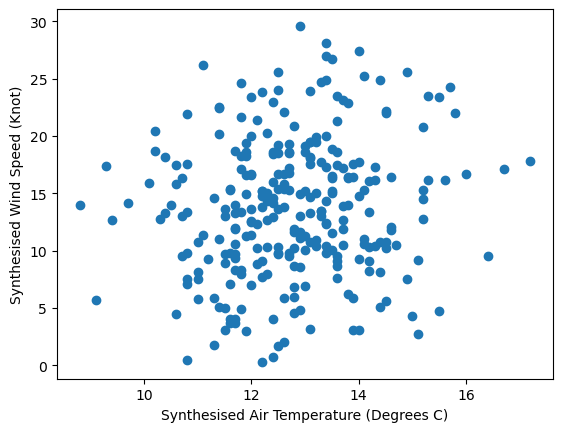

In [36]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Wind Speed (Knot)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Direction (Degrees Magnetic) is  [[ 1.        -0.0611943]
 [-0.0611943  1.       ]]


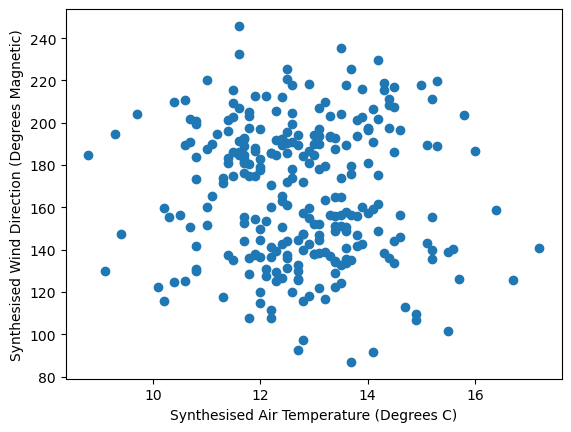

In [37]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Wind Direction (Degrees Magnetic)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Direction (Degrees Magnetic) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Barometric Pressure (Millibars) is  [[1.         0.11178375]
 [0.11178375 1.        ]]


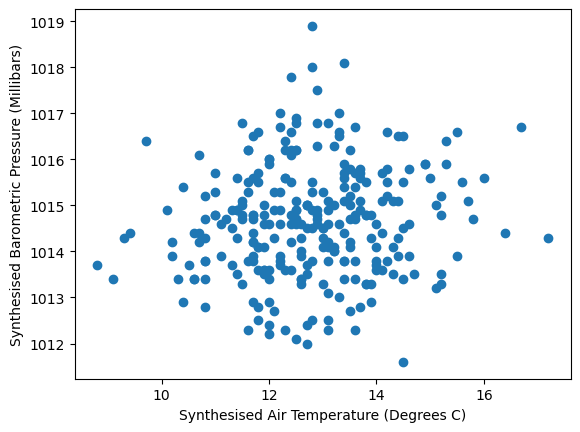

In [38]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is  [[ 1.         -0.03266382]
 [-0.03266382  1.        ]]


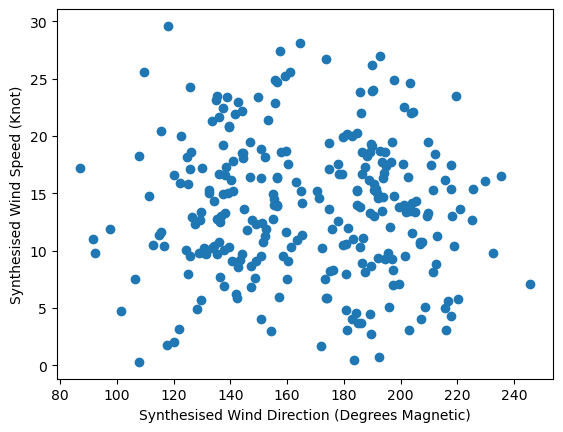

In [39]:
x =result['Synthesised Wind Direction (Degrees Magnetic)']
y =result['Synthesised Wind Speed (Knot)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Barometric Barometric Pressure (Millibars) is  [[1.         0.05905674]
 [0.05905674 1.        ]]


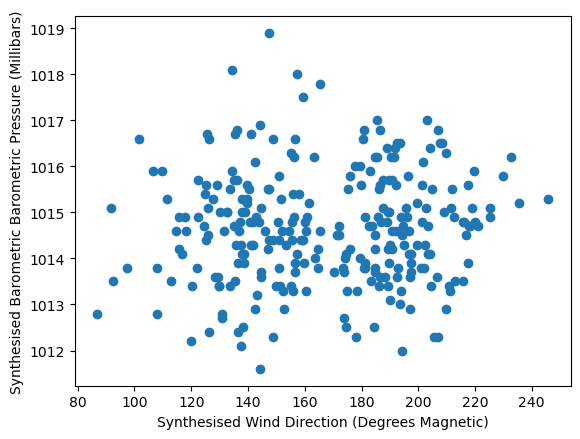

In [40]:
x =result['Synthesised Wind Direction (Degrees Magnetic)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Barometric Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Barometric Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is  [[ 1.         -0.03772017]
 [-0.03772017  1.        ]]


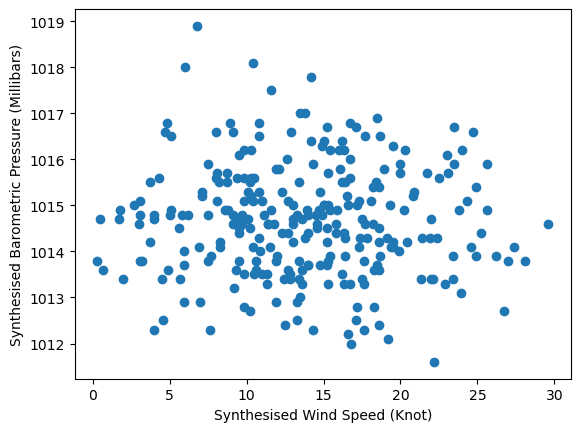

In [41]:
x =result['Synthesised Wind Speed (Knot)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Speed (Knot)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Synthesised Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is  [[ 1.         -0.03772017]
 [-0.03772017  1.        ]]


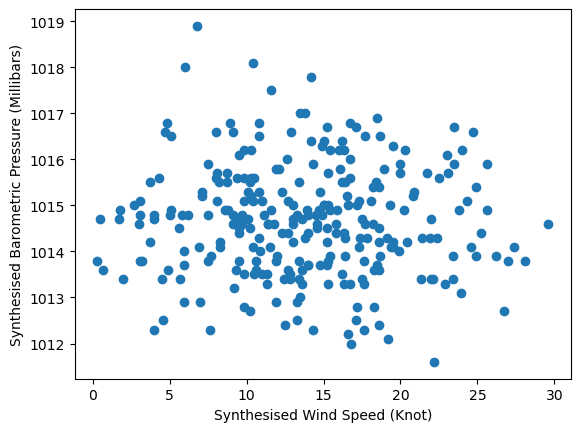

In [42]:
x =result['Synthesised Wind Speed (Knot)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Speed (Knot)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

# Relationship summary of Synthesised data

A correlation of -1 indicates a perfect negative correlation, 0 indicates no correlation and +1 indicates perfect positive correlation. 

From my research of the variables in my dataset, I was able to determine which variables  *should* have a strong relationship and which variables *should* be independent variables. 

As can be seen above, there is no correlation between the synthesised variables. This is an expected outcome when normal distribution is used to synthesise data. Normal distribution is centred around the mean, and extreme values in both tails of the distribution is unlikely. This results in weaker relationships between variables.https://statisticsbyjim.com/basics/normal-distribution/.

In [43]:
df2.describe()

,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,168.141912,13.728676,1014.639706
std,1.415816,32.276567,5.782885,1.183171
min,11.000000,68.900000,3.600000,1012.800000
25%,11.700000,142.875000,8.575000,1013.600000
50%,12.400000,170.050000,14.200000,1014.600000
75%,13.900000,191.100000,18.025000,1015.325000
max,17.500000,252.200000,26.100000,1017.100000


In [44]:
result.describe()

,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.755147,167.106985,13.751838,1014.665074
std,1.381470,32.586659,6.033094,1.222571
min,8.800000,86.900000,0.300000,1011.600000
25%,11.800000,139.650000,9.700000,1013.800000
50%,12.700000,167.800000,13.600000,1014.650000
75%,13.600000,192.675000,17.625000,1015.500000
max,17.200000,245.800000,29.600000,1018.900000


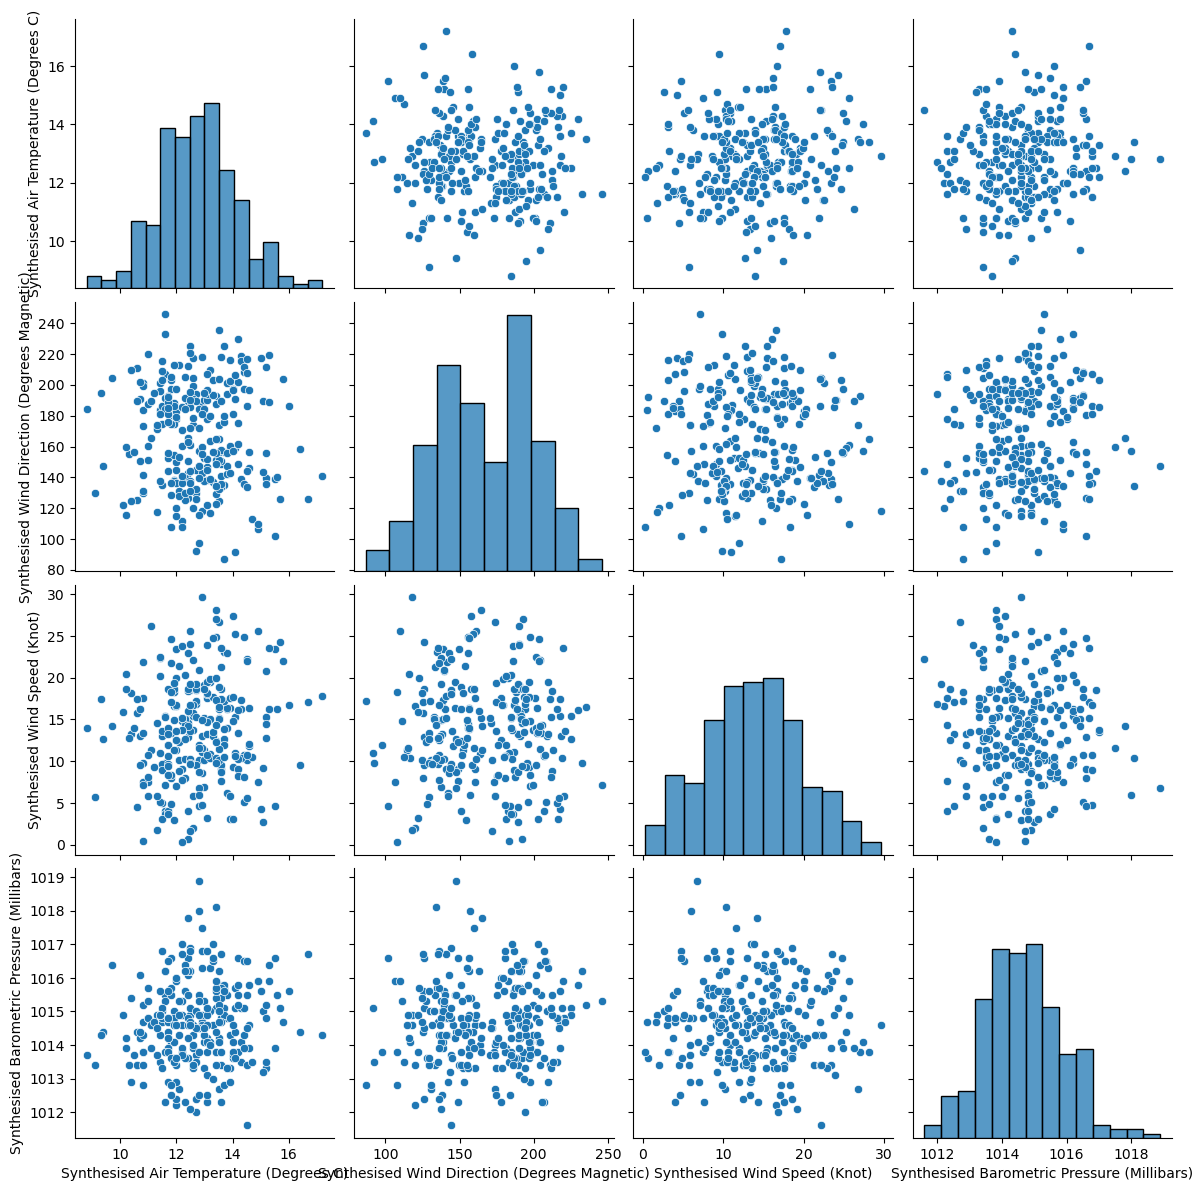

In [45]:
sns.pairplot(result, height=3, aspect=1)

# Discussion

The project brief was to create a data set by simulating a real-world phenomenon, and rather than collect data I should model and synthesise as closely matching their properties as possible such data using Python. I should then investigate the types of variables, their likely distributions and the relationship between the variables. I should 

In the steps above, I have synthesised a dataset called results, which contains 4 synthesised variables which are;

1. Synthesised Air Temperature (Degrees C)	
2. Synthesised Wind Direction (Degrees Magnetic)	
3. Synthesised Wind Speed (Knot)	
4. Synthesised Barometric Pressure (Millibars)

The distribution used to synthesised this data is discussed above.

By using .describe() on both my original and synthesised dataset I will now look at the .describe() properties of the variables.

- The mean value and standard deviation value in the original and synthesised datasets are aligned for all 4 of the variables. This is to be expected as normal distribution was used to synthesise 3 out of 4 variables and mean and standard deviation are inputs for normal distribution. 
- The min values while not totally aligned with original dataset are comparable, except in the case of Synthesised Wind Direction (Degrees Magnetic) where original min value is 68.9 and synthesised min value is 97.7.  
- The 25%,50% and 75% quartile values are also comparable for both datasets.  
- The max values for both datasets are comparable.


The relationship between variables in the original dataset matched with the results I expected from researching the variables.  However, the relationship between variables in the synthesised dataset is practically 0, which shows the variables are independent. This is due to normal distribution being used for synthesising data for 3 variables.



# Alternative distributions tested

For an alternative  "Synthesised Air Temperature (Degrees C)" I planned to use Dweibull distribution.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull.

The weibull distribuution is a continious probaility distribuion used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthessing Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continious random variable, typically used to model the failure rate of a system over time. 

I assigned the shape value = mean and scale = std dev as I found by doing this it matches original data set more closely. Consistently I found this distributuin was not a good match once seed was removed.

In [46]:
mean = 12.801
std_dev = 1.415
shape = mean
scale = std_dev

np.random.seed(70)
ts001 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])

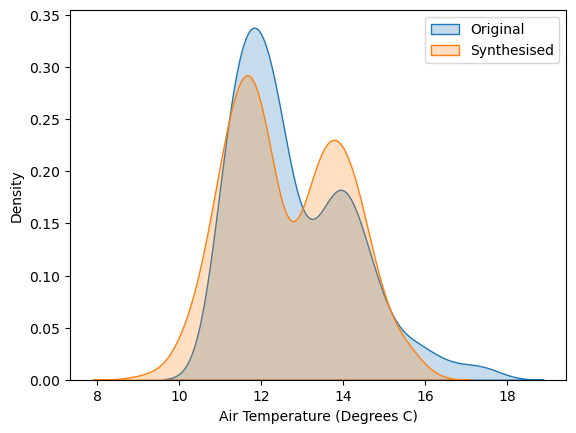

In [88]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True,label='Original')
sns.kdeplot(ts001['Synthesised Air Temperature (Degrees C)'],shade=True,label='Synthesised')
plt.legend()
plt.show()

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is  [[1.         0.07211025]
 [0.07211025 1.        ]]


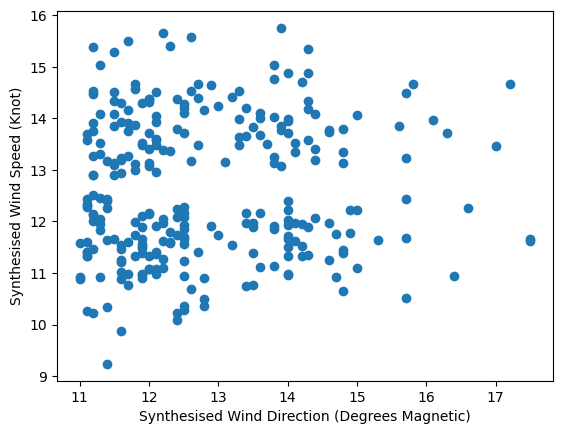

In [89]:
x =df2['Air Temperature (Degrees C)']
y =ts001['Synthesised Air Temperature (Degrees C)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


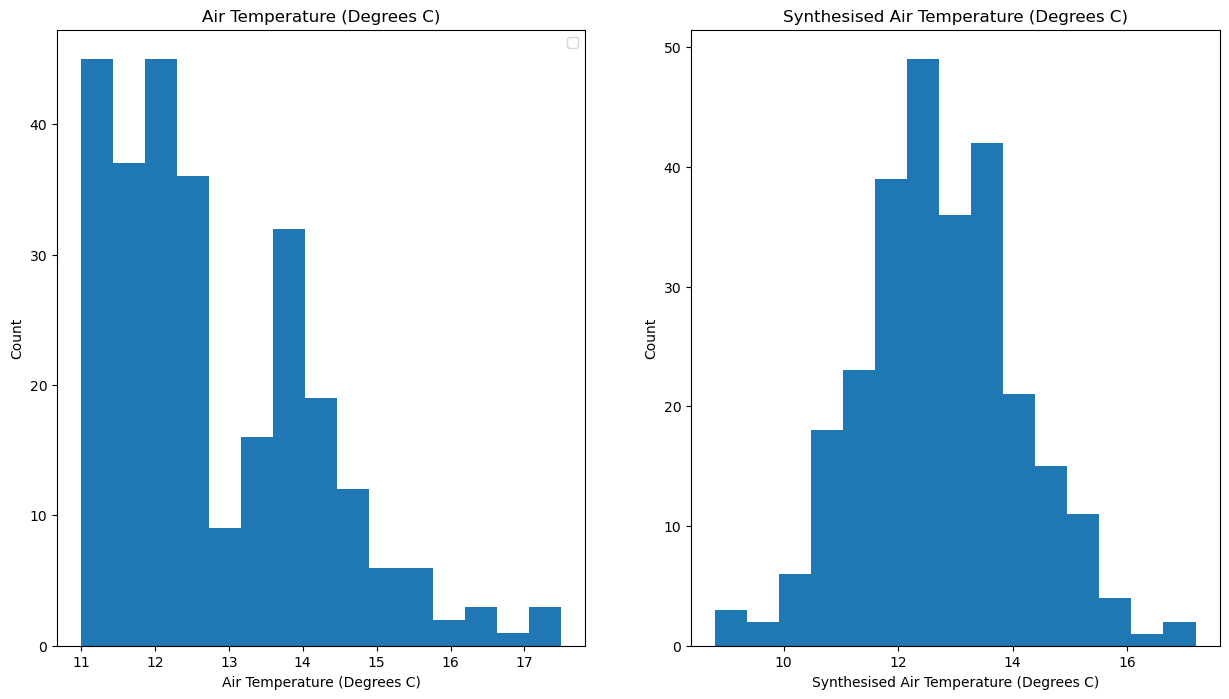

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.legend()
plt.title("Air Temperature (Degrees C)")
plt.subplot(1,2,2)
plt.hist(ts01["Synthesised Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Synthesised Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.title("Synthesised Air Temperature (Degrees C)")
plt.show()

In [91]:
x =df2['Air Temperature (Degrees C)']
y =ts01['Synthesised Air Temperature (Degrees C)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Synthesised Air Temperature (Degrees C) is ", r)

Correlation coefficient: between Air Temperature (Degrees C) & Synthesised Air Temperature (Degrees C) is  [[ 1.         -0.01235272]
 [-0.01235272  1.        ]]


In [92]:
x =df2['Wind Direction (Degrees Magnetic)']
y =ts02['Synthesised Wind Direction (Degrees Magnetic)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Synthesised Wind Direction (Degrees Magnetic) is ", r)

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Synthesised Wind Direction (Degrees Magnetic) is  [[1.         0.01646405]
 [0.01646405 1.        ]]


In [93]:
x =df2['Wind Speed (Knot)']
y =ts03['Synthesised Wind Speed (Knot)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)

Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is  [[ 1.         -0.08294004]
 [-0.08294004  1.        ]]


In [94]:
x =df2['Barometric Pressure (Millibars)']
y =ts04['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Barometric Pressure (Millibars) & Synthesised Barometric Pressure (Millibars) is ", r)

Correlation coefficient: between Barometric Pressure (Millibars) & Synthesised Barometric Pressure (Millibars) is  [[1.         0.14708308]
 [0.14708308 1.        ]]


Code block used to determine mode of variable
import statistics
data = np.loadtxt('data.csv')

mode = statistics.mode(data)

print("The mode of the dataset is:", mode)

In [95]:
df2.describe()

,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,168.141912,13.728676,1014.639706
std,1.415816,32.276567,5.782885,1.183171
min,11.000000,68.900000,3.600000,1012.800000
25%,11.700000,142.875000,8.575000,1013.600000
50%,12.400000,170.050000,14.200000,1014.600000
75%,13.900000,191.100000,18.025000,1015.325000
max,17.500000,252.200000,26.100000,1017.100000


In [96]:
#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html
left = 1012.8
mode = 1014.8
right = 1017.1
rng=np.random.default_rng()

d31 = pd.DataFrame(data = np.random.triangular(left, mode, right,100), columns = ["Synthesised Barometric Pressure (Millibars)"])


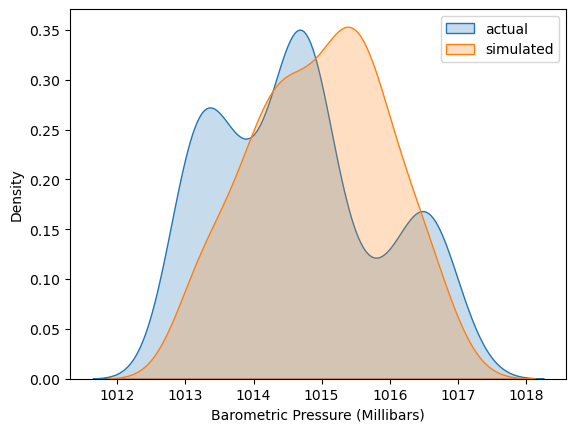

In [97]:
sns.kdeplot(df2['Barometric Pressure (Millibars)'],shade=True, label="actual")
sns.kdeplot(d31['Synthesised Barometric Pressure (Millibars)'],shade=True, label="simulated")
plt.legend()

I used following code to identify suitable distributions for my data. After testing these, I did not find a more suitable distribution.
#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
f.summary()


some ditsributions I tested to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

# Conclusion

In conclusion, this project has shown that a dataset can be synthesised using various distribution models. After comparing my original data set and sythessied dataset, I can see that the mean and standard deviation values of both datasets are nearly identical. The min,max and 25%,50% and 75% values are also closely aligned. However, the relationships that exist in my original dataset are not evident in my synthessisd dataset. I believe this is due to using normal distribution when synthesisng variables.  

As mentioned previously, I had planned on using Dweibull and Triangular distributions for 2 of my variables instead of normal distribution. However, once the *seed* was removed from the code, then the synthesised data did not match as consistently as Dweibull and Triangular distributions compared to normal distribution.

I would have liked if my origianal dataset contained at least one categorical variable as its easier to interpret and visualise data, especially pairplots. Also, I would have liked if the data was recorded later than 2015. 

I enjoyed completing this project. It is my first exposure to synthesising data and the various distribution models. 

End